In [49]:
# Import modules
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

##### Import Shapefiles

In [70]:
#import county shapefiles
counties = "..\\Data\\county_shape_files\\cb_2018_us_county_20m.zip"
counties = gpd.read_file(counties)

In [37]:
#import 20 min walk shapefiles
walk_20_path = "..\\Data\\VaccineAccessShapefiles\\20_min_walk_polys.zip"
walk20 = gpd.read_file(walk_20_path)

In [2]:
#import 15 minute drive shapefiles
drive_15_path = "C:\\Users\\lucin\\OneDrive\\Documents\\Shapefile490.zip"
drive15 = gpd.read_file(drive_15_path)

In [3]:
#import dot density map
dotdata = "..\\Data\\dot_map.zip"
racial_data = gpd.read_file(dotdata)

#update projection
racial_data = racial_data.set_crs('EPSG:3857')
racial_data = racial_data.to_crs(drive15.crs)

#### Sanity check plots

<AxesSubplot:>

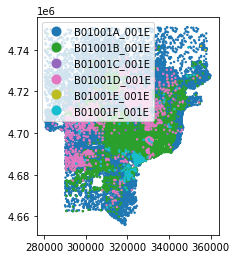

In [4]:
racial_data.plot(markersize=2, column='field', categorical=True, legend=True)

<AxesSubplot:>

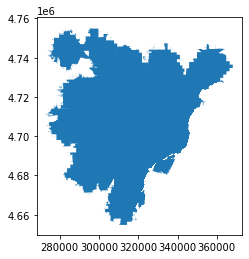

In [5]:
drive15.plot()

#### Run spatial dissolve

,geometry,FID
0,"POLYGON ((285316.991 4677749.112, 285316.793 4...",0


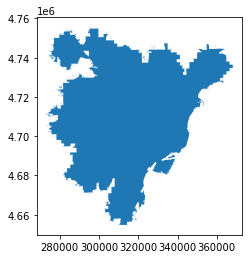

In [6]:
drive15_dis =drive15.dissolve()

drive15_dis.plot()
drive15_dis

,geometry,FID
0,"MULTIPOLYGON (((289925.164 4674726.166, 289922...",0


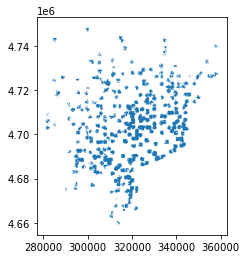

In [38]:
walk20_dis = walk20.dissolve()

walk20_dis.plot()
walk20_dis

#### Clip data by vaccine access

In [39]:
walk20_clip = gpd.clip(racial_data, walk20_dis)

<AxesSubplot:>

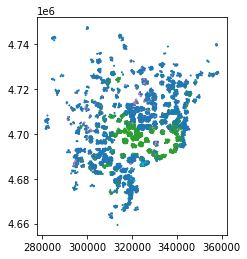

In [40]:
walk20_clip.plot(markersize=1, column='field', categorical=True)

In [7]:
drive15_clip = gpd.clip(racial_data, drive15_dis)

<AxesSubplot:>

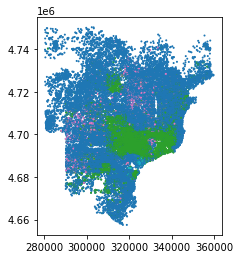

In [8]:
drive15_clip.plot(markersize=1, column='field', categorical=True)

#### Counts!!

In [33]:
def racial_stats(tbl):
    races = tbl.groupby('field').agg(['count'])
    
    total = races['level_0'].sum()[0]
    
    white= races['level_0']['count'][0]
    black= races['level_0']['count'][1]
    AI_AK= races['level_0']['count'][2]
    asian= races['level_0']['count'][3]
    NH_PI= races['level_0']['count'][4]
    other= races['level_0']['count'][5]
    
    return [total, white, black, AI_AK, asian, NH_PI, other]

In [34]:
total = racial_stats(racial_data)
total

[36079, 25239, 8997, 25, 1531, 3, 284]

In [36]:
drive15 = racial_stats(drive15_clip)
drive15

[34846, 24105, 8904, 25, 1528, 3, 281]

In [41]:
walk20 = racial_stats(walk20_clip)
walk20

[9922, 6779, 2630, 8, 377, 1, 127]

In [68]:
#Total population distribution based on our aggregated dots
population = []
for i in range(len(total)):
    population.append(total[i]/total[0])
    
population

[1.0,
 0.699548213642285,
 0.24936943928601124,
 0.0006929238615260955,
 0.04243465727985809,
 8.315086338313146e-05,
 0.007871615066936444]

In [45]:
#Population with access to a vaccine clinic within a 15 minute drive
drive_access = []
for i in range(len(drive15)):
    drive_access.append(drive15[i]/drive15[0])
    
drive_access

[1.0,
 0.6917580210067152,
 0.25552430695058254,
 0.0007174424611146186,
 0.04385008322332549,
 8.609309533375423e-05,
 0.008064053262928313]

In [46]:
#Population with access to a vaccine clinic within a 20 min walk
walk_access = []
for i in range(len(walk20)):
    walk_access.append(walk20[i]/walk20[0])
    
walk_access

[1.0,
 0.6832291876637775,
 0.26506752670832495,
 0.0008062890546260835,
 0.03799637169925418,
 0.00010078613182826043,
 0.012799838742189075]

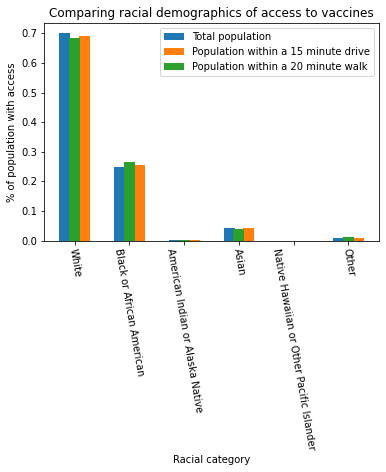

In [93]:
labels = ['White', 'Black or African American', 'American Indian or Alaska Native', 'Asian', 'Native Hawaiian or Other Pacific Islander', 'Other']

x = np.arange(len(labels))
width = .6

fig,ax= plt.subplots()
tot = ax.bar(x- width * .3, population[1:], width/3, label='Total population')
dr15 = ax.bar(x + width * .3, drive_access[1:], width/3, label='Population within a 15 minute drive')
wk20 = ax.bar(x, walk_access[1:], width/3, label='Population within a 20 minute walk')

ax.set_ylabel('% of population with access')
ax.set_xlabel('Racial category')
ax.set_title('Comparing racial demographics of access to vaccines')

ax.set_xticks(x)

plt.draw()
ax.set_xticklabels(labels, rotation =-80)

ax.legend()

plt.show()